# Project (week 1)

## Description

Titanic is undirected and weighted Nodes are characters. Links represent a same-scene appearance between two characters in the movie, and the weight gives the number of same-scene appearance.

Task:
1. Pick a social network among the one proposed on luiss.learn
2. Implement it in Python.
3. Draw the graph
4. Compute the number of nodes,edges, average degree and the density. Comment.
> Be careful if the network that you have picked is directed or not.

## Comment Requirements:
- It should contain an introduction (around 250 words), a conclusion (around 250 words) and, for each question, explanations/analysis (100-150 words).

In [ ]:
# Basic Imports
import numpy as np 
import matplotlib.pyplot as plt
import csv
import networkx as nx

## Load Data

In [2]:
# Read nodes from the CSV file
G = nx.Graph()
with open('../Graph/nodes.csv', 'r') as file: # Open the CSV file
    reader = csv.DictReader(file) # DictReader is a class that reads a CSV file and converts it into a dictionary
    for row in reader: # Each row is a dictionary
        G.add_node(row['Id'], label=row['Label']) # Add a node to the graph with the node id and label

# Read edges from the CSV file
with open('../Graph/edges.csv', 'r') as file: 
    reader = csv.DictReader(file)
    for row in reader:
        G.add_edge(row['Source'], row['Target'], weight=int(row['Weight'])) # Add an edge to the graph with the source, target and weight


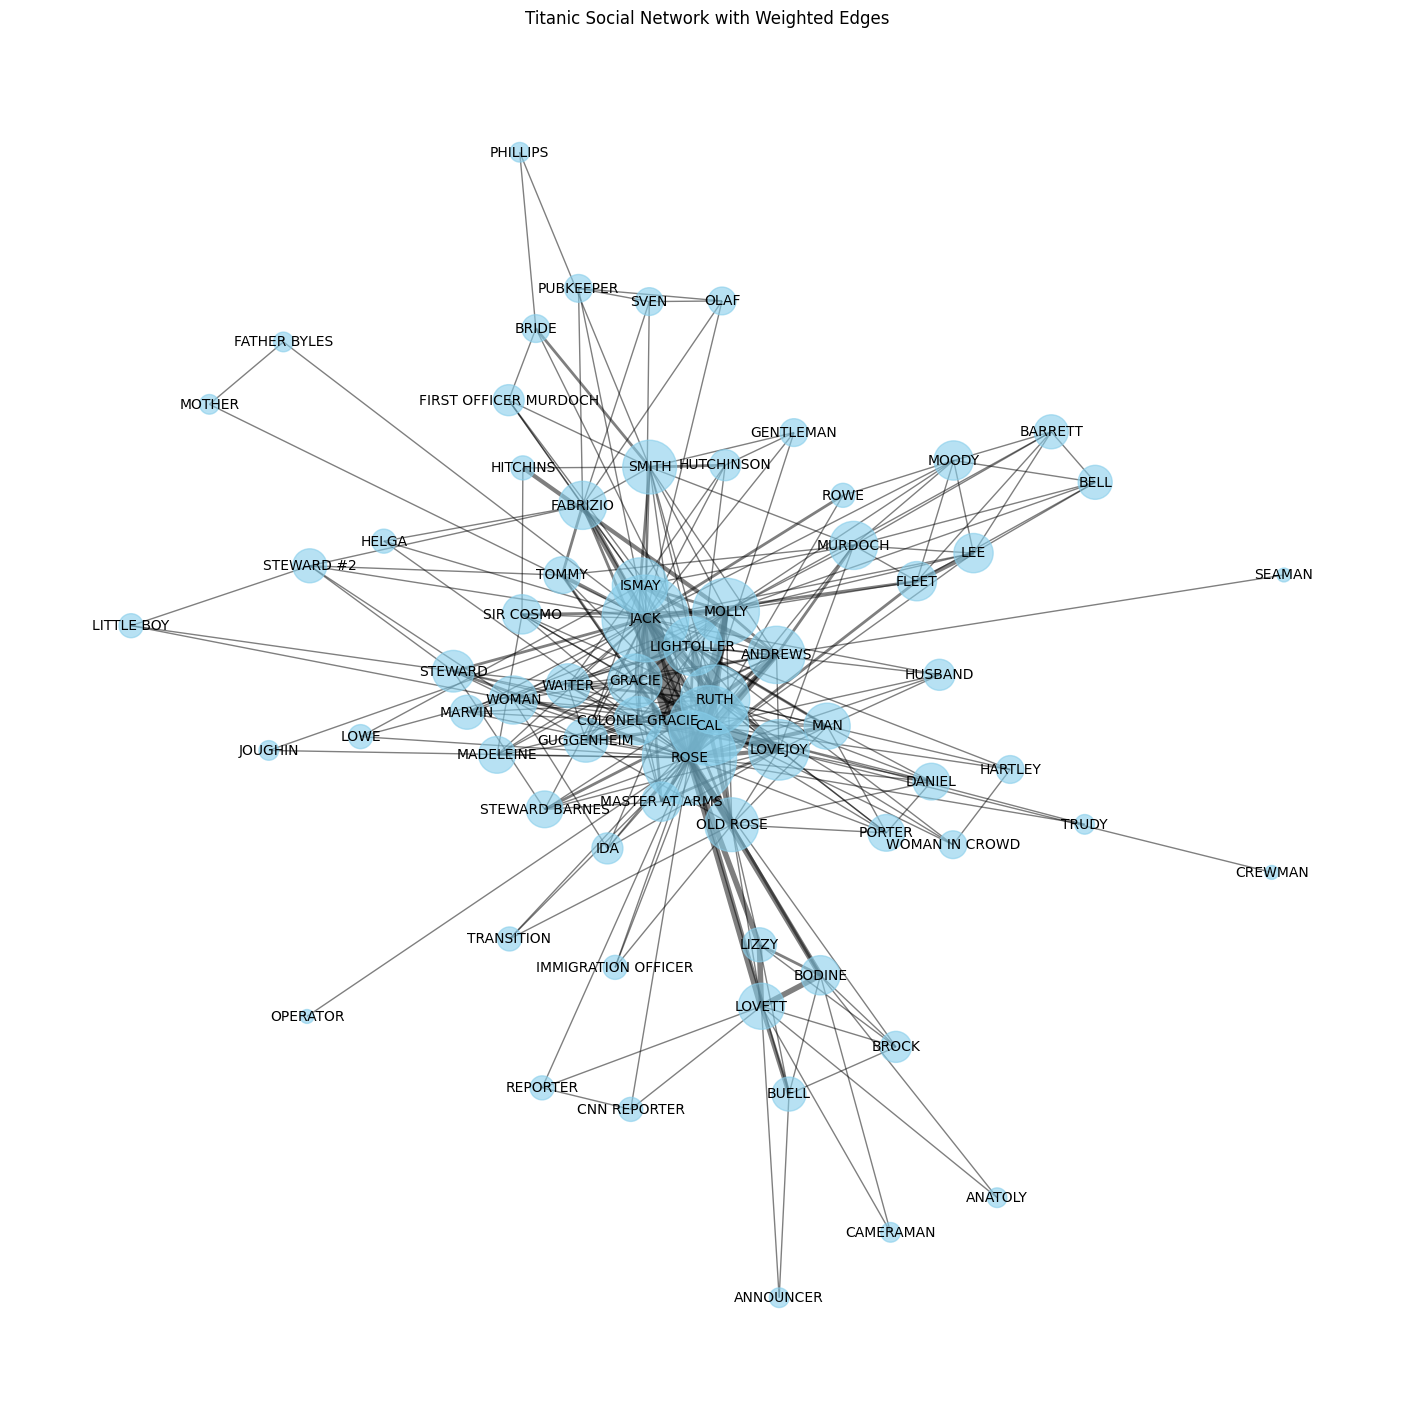

In [3]:

# Set up the plot dimensions
plt.figure(figsize=(18, 18))

# Use the spring layout algorithm for positioning nodes
pos = nx.spring_layout(G)

# Adjust node sizes based on their degrees
node_sizes = [v * 100 for v in dict(G.degree()).values()]

# Adjust edge widths based on their weights
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)

plt.title("Titanic Social Network with Weighted Edges")
plt.axis("off")
plt.show()


In [4]:
#number of nodes
print("Number of nodes: ", G.number_of_nodes()) 

Number of nodes:  70


In [5]:
#number of edges
print("Number of edges: ", G.number_of_edges())

Number of edges:  299


In [6]:
#average degree
print("Average degree: ", np.mean([d for n, d in G.degree()]))

Average degree:  8.542857142857143


In [7]:
#density
print("Density: ", nx.density(G))

Density:  0.12380952380952381
